In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#inputs are the training data, the labels and the number of training datapoints to use for validation
def data_partition(data,labels,n_validation):
    rows = np.linspace(0,len(labels)-1,len(labels),dtype=int)
    np.random.shuffle(rows)
    
    n_training = len(data) - n_validation
    
    train_data = data[rows[:n_training]]
    train_labels = labels[rows[:n_training]]
    
    val_data = data[rows[n_training:]]
    val_labels = labels[rows[n_training:]]
    
    return train_data,train_labels,val_data,val_labels
import sklearn.svm as svm
from sklearn.metrics import accuracy_score as score
%matplotlib inline

In [2]:
#inputs are the training data, the labels and the number of training datapoints to use for validation
def data_partition(data,labels,n_validation):
    rows = np.linspace(0,len(labels)-1,len(labels),dtype=int)
    np.random.shuffle(rows)
    
    n_training = len(data) - n_validation
    
    train_data = data[rows[:n_training]]
    train_labels = labels[rows[:n_training]]
    
    val_data = data[rows[n_training:]]
    val_labels = labels[rows[n_training:]]
    
    return train_data,train_labels,val_data,val_labels

## a) Partitioning MNIST dataset

In [3]:
mnist = np.load('data/mnist-data.npz')

In [4]:
mnist.files

['training_data', 'test_data', 'training_labels']

In [5]:
mnist['training_data'].shape

(60000, 1, 28, 28)

In [6]:
#Need to reshape the data to have the images be row vectors
mnist_data=mnist['training_data'].reshape(60000,784)

In [7]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_data, 
                                                                         mnist['training_labels'], 10000)

In [8]:
#check that training and validation sizes are correct
print('training/input : ',len(mnist_t_data))
print('validation/input : ',len(mnist_v_data))

training/input :  50000
validation/input :  10000


## b) Partitioning spam dataset

In [9]:
spam = np.load('data/spam-data.npz')

In [10]:
spam.files

['training_data', 'training_labels', 'test_data']

In [11]:
spam_t_data,spam_t_labels,spam_v_data,spam_v_labels = data_partition(spam['training_data'],spam['training_labels'],
                                                                     round(0.2*len(spam['training_labels'])))

In [12]:
#check that training and validation sizes are correct
print('training/input : ',len(spam_t_data)/len(spam['training_data']))
print('validation/input : ',len(spam_v_data)/len(spam['training_data']))

training/input :  0.8000958772770853
validation/input :  0.19990412272291466


## c) Partitioning CIFAR-10 dataset

In [13]:
cifar = np.load('data/cifar10-data.npz')

In [14]:
cifar.files

['training_data', 'test_data', 'training_labels']

In [15]:
cifar_t_data, cifar_t_labels, cifar_v_data, cifar_v_labels = data_partition(cifar['training_data'],
                                                                            cifar['training_labels'],5000)

In [16]:
#check that training and validation sizes are correct
print('training data length: ',len(cifar_t_data))
print('validation data length: ',len(cifar_v_data))

training data length:  45000
validation data length:  5000


# Q3

In [17]:
# This function is for the SVC model; kernel can be selected. Takes in traing and validation sets, returns prediction
# scores for both
def sk_svm(t_data, t_labels,v_data,v_labels, batch_sizes, c=1,kernel='linear',degree=2):
    
    t_scores = []
    v_scores = []
    for n in batch_sizes:
        clf=svm.SVC(C=c, kernel=kernel)
        clf.fit(t_data[:n], t_labels[:n])
        t_scores += [score(clf.predict(t_data),t_labels)]
        v_scores += [score(clf.predict(v_data),v_labels)]
    return t_scores, v_scores

In [18]:
#This function is just for the plots for Q3
def accuracy_plot(batch, t_scores, v_scores, dataset):
    plt.figure(figsize=(6,5))
    plt.plot(batch, t_scores,label='Training')
    plt.plot(batch, v_scores,label='Validation')
    plt.title('SVM Accuracy for {}'.format(dataset))
    plt.xlabel('Training batch size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('Q3_{}_plot'.format(dataset), dpi=300)

## a)

In [19]:
batch = [100,200,500,1000,2000,5000,10000]

In [20]:
mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, batch, c=1)

In [21]:
mnist_t_scores

[0.7482, 0.79746, 0.8582, 0.8761, 0.89758, 0.91316, 0.93018]

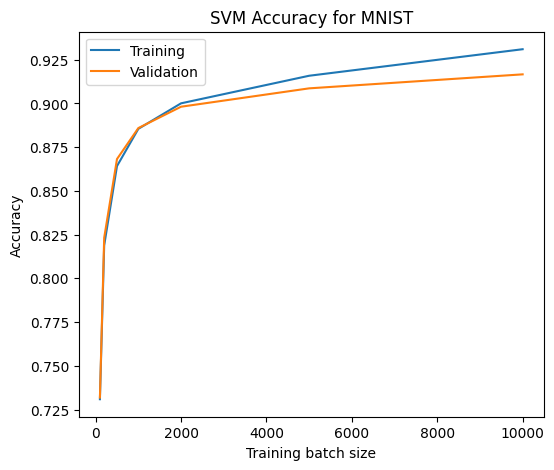

In [51]:
accuracy_plot(batch,mnist_t_scores,mnist_v_scores, 'MNIST')

## b)

In [86]:
batch=[100,200,500,1000,2000,len(spam_t_data)]

In [65]:
spam_t_scores, spam_v_scores = sk_svm(spam_t_data,spam_t_labels,spam_v_data,spam_v_labels,batch)

In [66]:
spam_v_scores

[0.7314148681055156,
 0.7170263788968825,
 0.7709832134292566,
 0.7925659472422062,
 0.7925659472422062,
 0.8069544364508393]

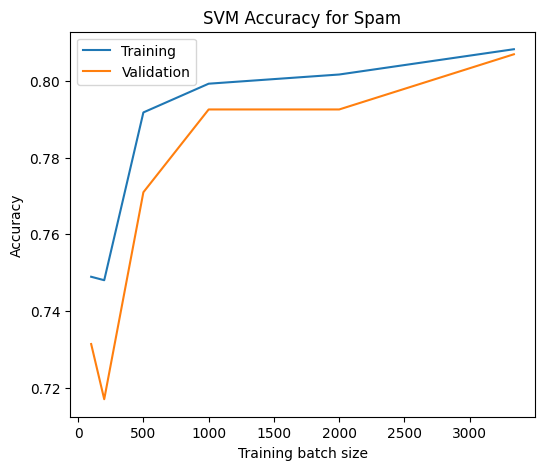

In [67]:
accuracy_plot(batch,spam_t_scores,spam_v_scores, 'Spam')

## c)

In [72]:
batch=[100,200,500,1000,2000,5000]

In [73]:
cifar_t_scores, cifar_v_scores = sk_svm(cifar_t_data, cifar_t_labels, cifar_v_data, cifar_v_labels,batch)

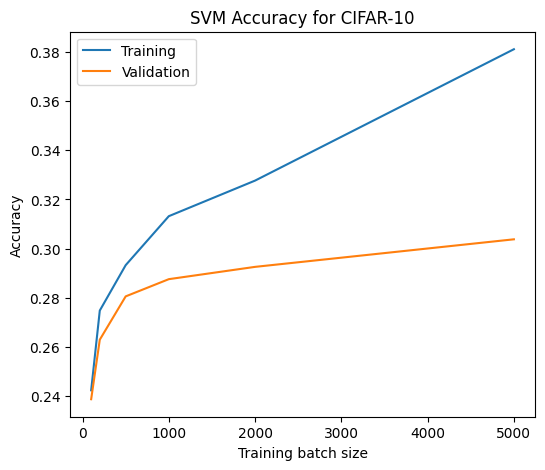

In [74]:
accuracy_plot(batch,cifar_t_scores,cifar_v_scores, 'CIFAR-10')

# Q4 Hyperparameter tuning

In [91]:
C=[10**n for n in np.linspace(-4,4,9)]

In [96]:
def linear_svm(t_data, t_labels,v_data,v_labels, c=1):
    
    clf=svm.LinearSVC(dual=False, C=c)
    clf.fit(t_data, t_labels)
    
    return score(clf.predict(v_data),v_labels)

In [97]:
len(mnist_t_data)

50000

In [98]:
accuracies = []
for c in C:
    accuracies+=[linear_svm(mnist_t_data[:10000], mnist_t_labels[:10000],mnist_v_data,mnist_v_labels, c=c)]

C:\Users\Colin\Anaconda3\envs\python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Colin\Anaconda3\envs\python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
from math import log10

In [105]:
log_C=[log10(c) for c in C]

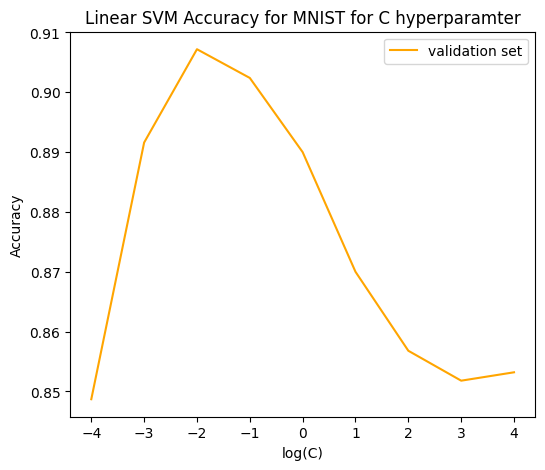

In [114]:
plt.figure(figsize=(6,5))
plt.plot(log_C, accuracies,c='orange', label = 'validation set')
plt.title('Linear SVM Accuracy for MNIST for C hyperparamter')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Q4_tuning_plot', dpi=300)

# Q5

In [22]:
# This function takes in a dataset with labels, shuffles them both randomly, then partitions the data into k sets of equal size
# It returns a list of k tuples containing training data and its corresponding labels

def kfold_partition(data,labels,k_fold):
    rows = np.linspace(0,len(labels)-1,len(labels),dtype=int)
    np.random.shuffle(rows)
    
    data_partition = np.array_split(data[rows],k_fold)
    label_partition = np.array_split(labels[rows],k_fold)
    
    partitions = []
    
    for i in range(k_fold):
        partitions+=[(list(data_partition[i]),list(label_partition[i]))]
   
    return partitions

In [132]:
partitions = kfold_partition(spam['training_data'],spam['training_labels'],5)

In [227]:
# This function takes in partitioned data and returns an average accuracy score.
# The CV number depends on the number of partitions of the passed-in data

def kfold_cv(data,c):
    
    cv_accuracy=[]
    
    
    for i in range(len(data)):
        # generate the validation set; each set is the validation set once
        v_data = np.array(data[i][0])
        v_labels = np.array(data[i][1])
        
        # initialize a list for the training sets
        t_data=[]
        t_labels=[]
        
        # combined the partitions from the passed-in data, so long as the partition is not the validation set
        for j in range(len(data)):
            t_data += [x for x in data[j][0] if j != i]
            t_labels += [y for y in data[j][1] if j!= i]
            
        # train an svm and predict on the validation set; get the accuracy
        cv_accuracy+=[linear_svm(t_data, t_labels,v_data,v_labels, c=c)]
        
    return sum(cv_accuracy)/len(cv_accuracy)

In [228]:
#generate 12 possible values for the C hyperparamater
C=[10**n for n in np.linspace(-6,6,13)]

#get the logs of the Cs for plotting
log_C=[log10(c) for c in C]

In [229]:
# get the CV accuracies for each of the C values
accuracies=[]

for c in C:
    accuracies+=[kfold_cv(partitions,c=c)]

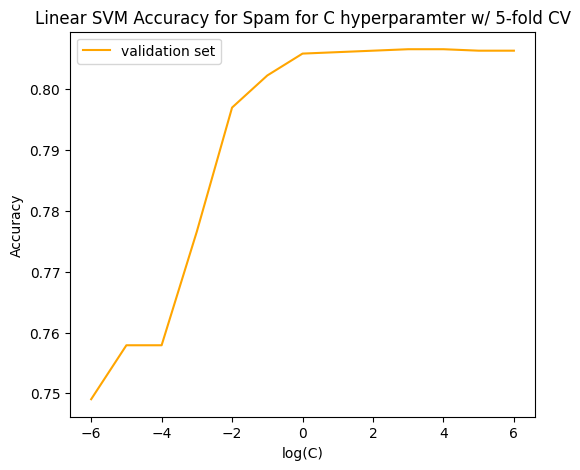

In [230]:
plt.figure(figsize=(6,5))
plt.plot(log_C, accuracies,c='orange', label = 'validation set')
plt.title('Linear SVM Accuracy for Spam for C hyperparamter w/ 5-fold CV')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Q5_k-fold_tuning_plot', dpi=300)

# Q6

## MNIST

In [352]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_data, 
                                                                         mnist['training_labels'], 10000)

In [373]:
predictor,mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, [200], c=200,kernel='rbf')

In [374]:
mnist_v_scores

[0.8186]

In [309]:
mnist_v_scores

[0.9829]

#### Got an accuracy of 0.9829 training on 50,000 samples. For the final model for Kaggle will train on the entire training set

In [313]:
len(mnist_data)

60000

In [375]:
predictor=svm.SVC(C=1000, kernel='rbf')
predictor.fit(mnist_data, mnist['training_labels'])

SVC(C=1000)

In [320]:
mnist['test_data'].shape

(10000, 1, 28, 28)

In [322]:
#Need to reshape the test data to have the images be row vectors
mnist_test_data=mnist['test_data'].reshape(10000,784)

In [376]:
test_preds = predictor.predict(mnist_test_data)

In [378]:
df = pd.DataFrame({'Id': np.linspace(1,10000,10000,dtype=int), 'Category': test_preds},dtype=np.int64)

In [379]:
df.to_csv('mnist_preds2.csv',index=False)

In [10]:
def add_features(data):
    
    means=[]

    for i in range(len(data)):
        means+=[data[i].mean()]
        
    means = np.array(means)
    means=means.reshape(len(data),1)
        
    mod_data = np.append(data,means,1)
#     mod_data = np.append(mod_data,zeros,1)
#     mod_data = np.append(mod_data,variances,1)
    
    return mod_data    

In [475]:
# add the row averages as a new feature
mnist_mod = add_features(mnist_data)

In [439]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_mod, 
                                                                         mnist['training_labels'], 10000)

In [446]:
mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, [50000], c=10,kernel='rbf')

In [447]:
mnist_v_scores

[0.9844]

### Adding the average pixel value for a datapoint yields an improvement; let's retrain a model on the entire training data with this added feature then get predictions on the test data to submit to Kaggle

In [449]:
predictor=svm.SVC(C=100, kernel='rbf')
predictor.fit(mnist_mod, mnist['training_labels'])

SVC(C=100)

In [451]:
#Need to reshape the test data to have the images be row vectors
mnist_test_data=mnist['test_data'].reshape(10000,784)

# add the row averages as a new feature
mnist_test_mod = add_features(mnist_test_data)

In [452]:
test_preds = predictor.predict(mnist_test_mod)

In [453]:
df = pd.DataFrame({'Id': np.linspace(1,10000,10000,dtype=int), 'Category': test_preds},dtype=np.int64)
df.to_csv('mnist_mod_preds.csv',index=False)

### Let's also try flipping the images and adding those columns as new features

In [464]:
mnist_mod.shape

(60000, 785)

In [457]:
mnist_flipped=np.fliplr(mnist_data)

In [465]:
mnist_mod = np.append(mnist_mod,mnist_flipped,1)

In [476]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_mod, 
                                                                         mnist['training_labels'], 10000)

In [539]:
mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, [50000], c=10,kernel='rbf')

In [540]:
mnist_v_scores

[0.981]

### Flipping the images doesn't improve the score. Let's try adding Gaussian Noise

In [751]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_data, 
                                                                         mnist['training_labels'], 10000)

In [752]:
mnist_t_data = add_features(mnist_t_data,add_noise=True)
mnist_v_data = add_features(mnist_v_data,add_noise=False)

In [753]:
mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, [200], c=10,kernel='rbf')

In [754]:
mnist_v_scores

[0.826]

### Let's try the Canny edge detector

In [14]:
import cv2 as cv

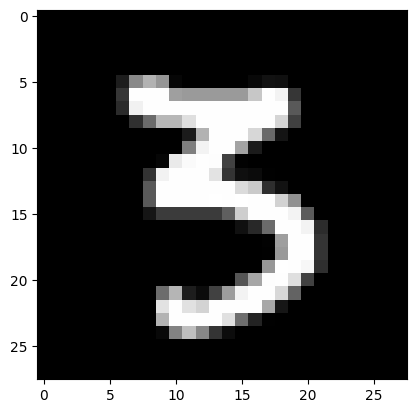

In [15]:
plt.imshow(mnist['training_data'][8][0],cmap='gray')

In [16]:
img = 255*mnist['training_data'][8][0]
img_blur = cv.GaussianBlur(img, (3,3), 0)

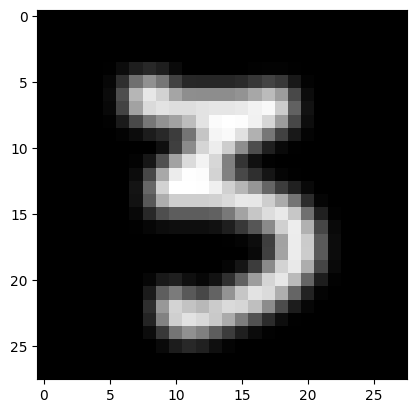

In [17]:
plt.imshow(img_blur,cmap='gray')

In [18]:
edge = cv.Canny(np.uint8(img_blur),90,200)

In [19]:
(1/255*edge).sum()/784

0.11224489795918367

### Adding the Canny output as features did not work so well. Let's instead create "new" data by adding Gaussian blur to the existing data and adding it onto the existing data.

In [20]:
#make a copy of the data to modify
blurry_mnist=mnist['training_data']

In [21]:
# for each image/data point, add blur and re-write the blurred image to that position in the array
for i in range(len(blurry_mnist)):
    #scale the pixel values back to the 0-255 range becasue it seems to work better when adding noise
    img = 255*blurry_mnist[i][0]
    blurry_mnist[i][0]=cv.GaussianBlur(img, (1,1), 0)
blurry_mnist=1/255*blurry_mnist

In [22]:
blurry_mnist=blurry_mnist.reshape(60000,784)

In [23]:
big_mnist=np.vstack((mnist_data,blurry_mnist))

In [24]:
big_mnist.shape

(120000, 784)

In [25]:
big_labels = np.hstack((mnist['training_labels'],mnist['training_labels']))

In [26]:
mnist['training_labels']

array([8, 9, 6, ..., 7, 1, 1], dtype=int64)

In [27]:
big_labels.shape

(120000,)

In [28]:
mnist_mod = add_features(big_mnist)

In [29]:
mnist_t_data,mnist_t_labels,mnist_v_data,mnist_v_labels = data_partition(mnist_mod, 
                                                                         big_labels, 5000)

In [30]:
mnist_t_scores, mnist_v_scores = sk_svm(mnist_t_data,mnist_t_labels, mnist_v_data, mnist_v_labels, [60000], c=10,kernel='rbf')

In [31]:
mnist_v_scores

[0.9908]

## This is for the Kaggle submission

In [33]:
predictor=svm.SVC(C=10, kernel='rbf')
predictor.fit(mnist_mod, big_labels)

SVC(C=10)

In [34]:
raw_test = mnist['test_data']

In [36]:
raw_test = raw_test.reshape(10000,784)

In [38]:
mod_test = add_features(raw_test)

In [40]:
preds = predictor.predict(mod_test)

In [42]:
df = pd.DataFrame({'Id': np.linspace(1,10000,10000,dtype=int), 'Category': preds},dtype=np.int64)
df.to_csv('big_mnist_preds.csv',index=False)

#### This is just troubleshooting

In [45]:
#lets compare these to the mnist_mod_preds since they are the current high score
df1=pd.read_csv('mnist_mod_preds.csv')
df['current high'] = df1['Category']

In [49]:
df.loc[df['Category'] != df['current high']]

,Id,Category,current high
98,99,7,1
6489,6490,1,7


### The following was an unsuccessful attempt to get more accuracy by adding the sum of edge pixels in an image as a feature. 

In [1521]:
edges=[]
for i in range(len(raw_test)):
    img = 255*raw_test[i][0]
    img_blur = cv.GaussianBlur(img, (11,11), 0)
    edge = cv.Canny(np.uint8(img_blur),120,180)
    edges+=[(1/255*edge).sum()/784]

In [1522]:
#Need to reshape the test data to have the images be row vectors
mnist_test_data=mnist['test_data'].reshape(10000,784)

# add the row averages as a new feature
mnist_test_mod = add_features(mnist_test_data)

In [1523]:
edges=np.array(edges).reshape(len(mnist_test_data),1)

In [1524]:
mnist_test_mod = np.append(mnist_test_mod,edges,1)

In [1525]:
test_preds = predictor.predict(mnist_test_mod)

In [1526]:
df = pd.DataFrame({'Id': np.linspace(1,10000,10000,dtype=int), 'Category': test_preds},dtype=np.int64)
df.to_csv('mnist_edgemod_preds.csv',index=False)

In [1527]:
df1=pd.read_csv('mnist_preds.csv')

In [1530]:
df1['cat 2'] = df['Category']

### There were no updates to the predictions so this additional feature was unhelpful

## Spam

In [198]:
import os

In [260]:
def get_freqs(path):
    
    files = os.listdir(path)
    word_freqs = {}

    for file in files:
        with open('{}/{}'.format(path,file), encoding='utf8', errors='ignore') as f:
            try:
                lines = f.readlines() # Read in text from file
            except Exception as e:
                    # skip files we have trouble reading.
                continue

        for i in range(len(lines)):
            words=lines[i].split()

            for word in words:
                if word not in word_freqs.keys():
                    word_freqs[word] = 1
                elif word in word_freqs.keys():
                    word_freqs[word] += 1
    
    word_freqs = sorted(word_freqs.items(), key=lambda x:x[1],reverse=True)
    return word_freqs

In [287]:
spam_freqs=get_freqs('data/spam')

In [288]:
ham_freqs=get_freqs('data/ham')

In [289]:
spam_words=[spam_freqs[:200][i][0] for i in range(200)]
spam_freqs=[spam_freqs[:200][i][1] for i in range(200)]

In [290]:
ham_words=[ham_freqs[:200][i][0] for i in range(200)]
ham_freqs=[ham_freqs[:200][i][1] for i in range(200)]

In [291]:
# add these all as features
additions=list(set(spam_words)^set(ham_words))

In [282]:
spam = np.load('data/spam-data.npz')

In [283]:
spam_t_data,spam_t_labels,spam_v_data,spam_v_labels = data_partition(spam['training_data'],spam['training_labels'],
                                                                     round(0.2*len(spam['training_labels'])))

In [284]:
spam_t_data.shape

(3338, 218)

In [285]:
spam_t_scores, spam_v_scores = sk_svm(spam_t_data,spam_t_labels,spam_v_data,spam_v_labels,[len(spam_t_data)],
                                      c= 4000,kernel='rbf')

In [286]:
spam_v_scores

[0.9448441247002398]

In [296]:
spam['training_data']

4172

## This is for the Kaggle Submission

In [299]:
predictor=svm.SVC(C=4000, kernel='rbf')
predictor.fit(spam['training_data'], spam['training_labels'])

SVC(C=4000)

In [301]:
spam_preds = predictor.predict(spam['test_data'])

In [303]:
df = pd.DataFrame({'Id': np.linspace(1,len(spam_preds),len(spam_preds),dtype=int), 'Category': spam_preds},dtype=np.int64)
df.to_csv('spam_preds.csv',index=False)

## CIFAR

In [40]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [62]:
def make_hog(data):
    
    fds = np.empty((0,70308),dtype=None)
    # hog_img=np.array(131072,dtype=None)
    
    for i in range(data.shape[0]):
        img=cifar['training_data'][3].reshape(3,32,32)
        img = img.transpose(1,2,0)
        
        resized = resize(img,(128*4,64*4))
        fd, hog_image = hog(resized, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
        fds = np.r_[fds,[fd]]
        
    return fds
        

In [63]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
hogged_cifar=make_hog(cifar['training_data'])

C:\Users\Colin\AppData\Local\Temp\ipykernel_9516\3630791607.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized, orientations=9, pixels_per_cell=(8, 8),


In [68]:
test.shape

(100, 70308)

C:\Users\Colin\AppData\Local\Temp\ipykernel_9516\2838016178.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized, orientations=9, pixels_per_cell=(8, 8),


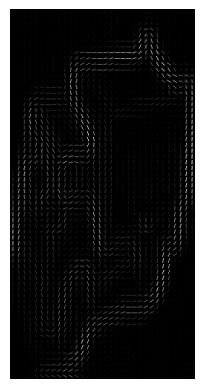

In [35]:
fd, hog_image = hog(resized, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [45]:
fd.shape

(70308,)

In [566]:
#This function takes in an array of shape (n,3072), sharpens the color image and converts it to grayscale; 
#returns a new array with shape (n,1024)

def sharpen(data):
    
    from PIL import Image
    
    arr = np.empty(1024, dtype=None)
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])  
    
    for i in range(data.shape[0]):
        img=data[i].reshape(3,32,32)
        img = img.transpose(1,2,0)
   
        img = cv.filter2D(src=img, ddepth=-1, kernel=kernel)
    
        gray=Image.fromarray(img).convert('L')
        arr = np.vstack((arr,np.array(gray).reshape(1024).astype(int))).astype(int)
        
    return arr

### let's take a look at the data

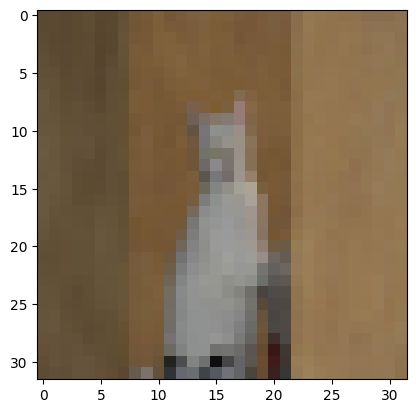

In [534]:
img=cifar['training_data'][2].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)

In [535]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img = cv.filter2D(src=img, ddepth=-1, kernel=kernel)

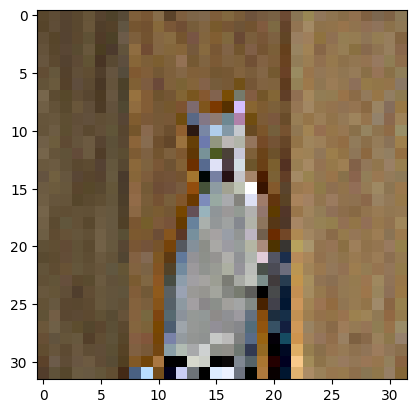

In [537]:
plt.imshow(img)

In [439]:
# image_sharp.reshape(3072)

array([ 82, 102, 141, ...,  96, 108, 103], dtype=uint8)

In [448]:
edge = cv.Canny(np.uint8(img),248,255)

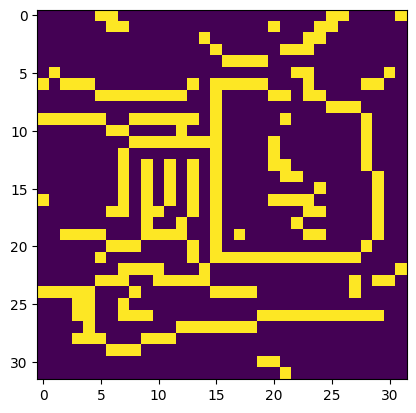

In [445]:
plt.imshow(edge)

In [405]:
from PIL import Image

In [538]:
gray=Image.fromarray(img).convert('L')

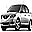

In [503]:
gray

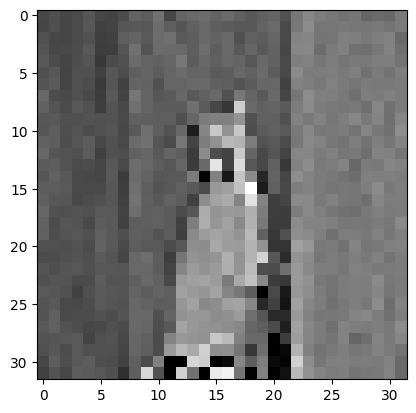

In [539]:
plt.imshow(gray,cmap='gray')

In [ ]:
# new=sharpen(cifar['training_data'])

In [18]:
cifar = np.load('data/cifar10-data.npz')

In [19]:
cifar_t_data, cifar_t_labels, cifar_v_data, cifar_v_labels = data_partition(cifar['training_data'],
                                                                            cifar['training_labels'],5000)

In [ ]:
cifar_t_scores, cifar_v_scores = sk_svm(cifar_t_data,cifar_t_labels,cifar_v_data,cifar_v_labels,[10000],
                                      c= 100,kernel='rbf')

In [36]:
cifar_v_scores

[0.3548]

## This is for the Kaggle submission

In [25]:
predictor=svm.SVC(C=100, kernel='rbf')
predictor.fit(cifar['training_data'][:25000], cifar['training_labels'][:25000])

SVC(C=100)

In [26]:
preds = predictor.predict(cifar['test_data'])

In [27]:
df = pd.DataFrame({'Id': np.linspace(1,len(preds),len(preds),dtype=int), 'Category':preds},dtype=np.int64)
df.to_csv('cifar25k_test_preds.csv',index=False)